# **Lab Project Part 2 - CNNs for Image Classification**
------------------------------

### General Guideline
1. **Aim**:
    - *Understand  the  basic  Image  Classification/Recognition  pipeline  and  the  data-driven  approach (train/predict stages).*
    - *Get used to one of deep learning framework(PyTorch).*
2. **Prerequisite**:
    - *Familiar with python and relevant packages.*
    - *Known the basic knowledge of Convolutional Neural Networks*
3. **Guidelines**:
    Students should work on the assignments in a group of *three person* for two weeks. Some minor additions and changes might be done during these three weeks. Students will be informed for these changes via Canvas. Any questions regarding the assignment content can be discussed on Piazza. Students are expected to do this assignment in Python and Pytorch, however students are free to choose other tools (like Tensorflow). Your source code and report must be handed in together in a zip file (*ID1_ID2_ID3.zip*) before the deadline. Make sure your report follows these guidelines:
    - *The maximum number of pages is 10 (single-column, including tables and figures). Please express your thoughts concisely.*
    - *Follow the given script and answer all given questions (in green boxes). Briefly describe what you implemented. Blue boxes are there to give you hints to answer questions.*
    - *Analyze your results and discuss them, e.g.*, why algorithm A works better than algorithm B in a certain problem.
    - *Tables and figures must be accompanied by a brief description. Do not forget to add a number, a title, and if applicable name and unit of variables in a table, name and unit of axes and legends in a figure.*
4. **Late submissions** are not allowed. Assignments that are submitted after the strict deadline will not be graded. In case of submission conflicts, TAs' system clock is taken as reference. We strongly recommend submitting well in advance, to avoid last minute system failure issues.
5. **Plagiarism note**: 
Keep in mind that plagiarism (submitted materials which are not your work) is a serious crime and any misconduct shall be punished with the university regulations.

### PyTorch versions
we assume that you are using the latest PyTorch version(>=1.4)

### PyTorch Tutorial & Docs
This tutorial aims to make you familiar with the programming environment that will be used throughout the course. If you have experience with PyTorch or other frameworks (TensorFlow, MXNet *etc.*), you can skip the tutorial exercises; otherwise, we suggest that you complete them all, as they are helpful for getting hands-on experience.

**Anaconda Environment** If you want to run the notebook locally, we recommend installing *anaconda* for configuring *python* package dependencies, whereas it's also fine to use other environment managers as you like. The installation of anaconda can be found in [anaconda link](https://docs.anaconda.com/anaconda/install/).

**Installation** The installation of PyTorch is available at [install link](https://pytorch.org/get-started/locally/) depending on your device and system.

**Getting start** The 60-minute blitz can be found at [blitz](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html), and and examples are at [examples](https://pytorch.org/tutorials/beginner/pytorch_with_examples.html)

**Documents** There might be potential unknown functions or classes, you shall look through the official documents website ([Docs](https://pytorch.org/docs/stable/index.html)) and figure them out by yourself. (***Think***: What's the difference between *torch.nn.Conv2d* and *torch.nn.functional.conv2d*?)
<!-- You can learn pytorch from the [tutorial link](https://pytorch.org/tutorials/). The Docs information can be searched at [Docs](https://pytorch.org/docs/stable/index.html). In this assignments, we wish you to form the basic capability of using one of the well-known   -->

##  **Introduction**

This part of the assignment makes use of Convolutional Neural Networks (CNN). The previous part makes use of hand-crafted features like SIFT to represent images, then trains a classifier on top of them. In this way, learning is a two-step procedure with image representation and learning. The method used here instead *learns* the features jointly with the classification. Training CNNs roughly consists of three parts:  (i) Creating the network architecture, (ii) Reprocessing the data, (iii) Feeding the data to the network, and updating the parameters. Please follow the instruction and finish the below tasks. (**Note:**  **Feel free to change the provided codes**.)

## **Session 1: Image Classifiation on CIFAR-100**
### 1.1 Install pytorch and run the given codes

First of all, you need to install PyTorch and relevant packages. In this session, we will use [CIFAR-100](https://www.cs.toronto.edu/~kriz/cifar.html) as the training and testing dataset. 

In [ ]:
!pip install torch-summary

In [1]:
#####################################################
# referenced codes: https://pytorch.org/tutorials/
# referenced codes: http://cs231n.stanford.edu/
# referenced codes: https://cs.stanford.edu/~acoates/stl10/
######################################################

import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim
import pickle
from torch.utils.data import Dataset, DataLoader
import random
import os
from torchsummary import summary
import torch.nn.init as init

In [2]:
#check the device available on your system
#For this project, a single GPU system with CUDA enabled was used 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [3]:
# Set the CUDA_LAUNCH_BLOCKING environment variable
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

In [4]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


trainset = torchvision.datasets.CIFAR100(root='./data', train=True,download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=5,shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR100(root='./data', train=False,download=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,shuffle=False, num_workers=2)

classes = ('apple', 'aquarium_fish', 'baby','bear', 'beaver','bed','bee','beetle','bicycle','bottle', 'bowl','boy','bridge', 'bus','butterfly', 'camel','can','castle','caterpillar','cattle',
 'chair','chimpanzee','clock','cloud', 'cockroach','couch', 'cra','crocodile', 'cup','dinosaur','dolphin', 'elephant','flatfish', 'forest', 'fox','girl', 'hamster', 'house','kangaroo','keyboard',
'lamp', 'lawn_mower', 'leopard', 'lion','lizard','lobster', 'man','maple_tree','motorcycle', 'mountain', 'mouse','mushroom','oak_tree', 'orange','orchid', 'otter', 'palm_tree','pear', 'pickup_truck','pine_tree',
'plain', 'plate', 'poppy','porcupine','possum','rabbit','raccoon','ray','road','rocket','rose','sea', 'seal', 'shark','shrew', 'skunk','skyscraper', 'snail','snake','spider',
'squirrel', 'streetcar', 'sunflower','sweet_pepper', 'table','tank','telephone', 'television', 'tiger','tractor','train','trout', 'tulip', 'turtle','wardrobe', 'whale', 'willow_tree','wolf', 'woman','worm')

Files already downloaded and verified


####  **` Q1.1: test dataloader and show the images of each class  of CIFAR-100 (3-pts)`**  
You need to run and modify the given code and **show** the example images of CIFAR-100, **describe** the classes and images of CIFAR-100. (Please visualize at least one picture for the classes of labels from 0 to 4.) (3-*pts*)

In [5]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

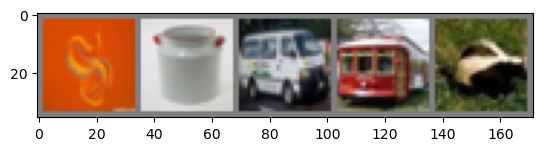

 worm   can   bus streetcar skunk


In [6]:
# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(5)))

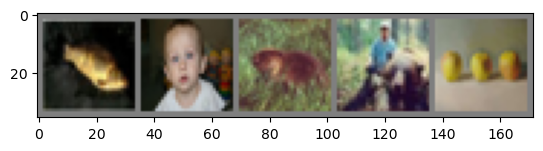

['aquarium_fish', 'baby', 'beaver', 'bear', 'apple']


In [7]:
#first 5 classes
sample_images = []
outstanding_labels = [c for c in classes[:5]]
labels_ordered = []

for step, (images, labels) in enumerate(trainloader):
    if len(outstanding_labels) == 0 or step > 100:
        break
    for image, label in zip(images, labels):
        _label = classes[label.item()]
        if _label in outstanding_labels:
            sample_images.append(image)
            outstanding_labels.remove(_label)
            labels_ordered.append(_label)

imshow(torchvision.utils.make_grid(sample_images, nrow=10))
print(labels_ordered)

### 1.2 Architecture understanding

In this section, we provide two wrapped classes of architectures defined by *nn.Module*. One is an ordinary two-layer network (*TwolayerNet*) with fully connected layers and ReLu, and the other is a Convolutional Network (*ConvNet*) utilizing the structure of [LeNet-5](https://ieeexplore.ieee.org/document/726791).

####  **`Q1.2: Architecture understanding. Implement architecture of TwolayerNet and ConvNet (4-pts).`**
1. Complement the architecture of *TwolayerNet* class, and complement the architecture of *ConvNet* class using the structure of LeNet-5. (2-*pts*)
2. Since you need to feed color images into these two networks, what's the kernel size of the first convolutional layer in *ConvNet*? and how many trainable parameters are there in "F6" layer (given the calculation process)? (2-*pts*)

In [12]:
class TwolayerNet(nn.Module):
    # assign layer objects to class attributes
    # nn.init package contains convenient initialization methods
    # http://pytorch.org/docs/master/nn.html#torch-nn-init
    def __init__(self,input_size ,hidden_size ,num_classes ):
        '''
        :param input_size: 3*32*32
        :param hidden_size: 
        :param num_classes: 
        '''
        ################################
        super(TwolayerNet, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_classes = num_classes
        self.F1 = nn.Linear(input_size, hidden_size)
        self.F2 = nn.Linear(hidden_size, num_classes)
        ################################
        
    def forward(self,x):
        # the input is flatten
#         device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#         x.to(device)
        x = x.view(x.shape[0], -1)
        x = nn.functional.relu(self.F1(x))
        scores = self.F2(x)
        return scores

In [13]:
### NOTE: For simplicity, you can use nn.tanh as the activation function and output the 1x100 !! length logits directly (omit the RBF units output).
class ConvNet(nn.Module):
    
    def __init__(self):
        super(ConvNet, self).__init__()
        self.C1 = nn.Conv2d(3, 6, 5)
        self.S2 = nn.AvgPool2d(2,2)
        self.C3 = nn.Conv2d(6, 16, 5)
        self.S4 = nn.AvgPool2d(2,2)
        self.F5 = nn.Linear(400, 120)
        self.F6 = nn.Linear(120, 84)
        self.out = nn.Linear(84, 100)
        
    def forward(self, x):
        x = torch.tanh(self.C1(x))
        x = self.S2(x)
        x = torch.tanh(self.C3(x))
        x = self.S4(x)
        #flatten before linear layers
        x = x.view(x.size(0), -1)
        x = torch.tanh(self.F5(x))
        x = torch.tanh(self.F6(x))
        x = self.out(x)
        
        return x

In [10]:
tln_model = TwolayerNet(3072, 128, 100)
summary(tln_model, (3, 32, 32))

Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [-1, 128]                 393,344
├─Linear: 1-2                            [-1, 100]                 12,900
Total params: 406,244
Trainable params: 406,244
Non-trainable params: 0
Total mult-adds (M): 0.41
Input size (MB): 0.01
Forward/backward pass size (MB): 0.00
Params size (MB): 1.55
Estimated Total Size (MB): 1.56


Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [-1, 128]                 393,344
├─Linear: 1-2                            [-1, 100]                 12,900
Total params: 406,244
Trainable params: 406,244
Non-trainable params: 0
Total mult-adds (M): 0.41
Input size (MB): 0.01
Forward/backward pass size (MB): 0.00
Params size (MB): 1.55
Estimated Total Size (MB): 1.56

In [11]:
cnn_model = ConvNet()
summary(cnn_model, (3, 32, 32))

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 6, 28, 28]           456
├─AvgPool2d: 1-2                         [-1, 6, 14, 14]           --
├─Conv2d: 1-3                            [-1, 16, 10, 10]          2,416
├─AvgPool2d: 1-4                         [-1, 16, 5, 5]            --
├─Linear: 1-5                            [-1, 120]                 48,120
├─Linear: 1-6                            [-1, 84]                  10,164
├─Linear: 1-7                            [-1, 100]                 8,500
Total params: 69,656
Trainable params: 69,656
Non-trainable params: 0
Total mult-adds (M): 0.66
Input size (MB): 0.01
Forward/backward pass size (MB): 0.05
Params size (MB): 0.27
Estimated Total Size (MB): 0.33


Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 6, 28, 28]           456
├─AvgPool2d: 1-2                         [-1, 6, 14, 14]           --
├─Conv2d: 1-3                            [-1, 16, 10, 10]          2,416
├─AvgPool2d: 1-4                         [-1, 16, 5, 5]            --
├─Linear: 1-5                            [-1, 120]                 48,120
├─Linear: 1-6                            [-1, 84]                  10,164
├─Linear: 1-7                            [-1, 100]                 8,500
Total params: 69,656
Trainable params: 69,656
Non-trainable params: 0
Total mult-adds (M): 0.66
Input size (MB): 0.01
Forward/backward pass size (MB): 0.05
Params size (MB): 0.27
Estimated Total Size (MB): 0.33

### 1.3 Preparation of training

In above section, we use the *CIFAR-100* dataset class from *torchvision.utils* provided by PyTorch. Whereas in most cases, you need to prepare the dataset yourself. One of the ways is to create a *dataset* class yourself and then use the *DataLoader* to make it iterable. After preparing the training and testing data, you also need to define the transform function for data augmentation and optimizer for parameter updating. 

####  **` Q1.3: Preparation of training. Create Dataloader yourself and define Transform, optimizer.(8-pts)`**  
1. Complement the *CIFAR100\_loader* (2-pts)
2. Complement *Transform* function and *Optimizer* (2-pts)
3. Train the *TwolayerNet* and *ConvNet* with *CIFAR100\_loader*, *Transform* and *Optimizer* you implemented and compare the results (4-pts)

##### *` Complement  CIFAR100_loader()(2-pts)`*

In [3]:
###  suggested reference: https://pytorch.org/tutorials/recipes/recipes/custom_dataset_transforms_loader.html?highlight=dataloader
# functions to show an image

class CIFAR100_loader(Dataset):
    def __init__(self,root,train=True,transform = None):
        dict_data = self.unpickle(root)
        self.labels = dict_data['fine_labels']
        imgs = dict_data['data']
        self.data = self.img_format(imgs)
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def img_format(self, data):
        #dim should be 32 in this case
        dim=np.sqrt(data.shape[1]/3).astype(int)
        
        r = data[:, 0:1024].reshape(data.shape[0], dim, dim, 1)
        g = data[:, 1024:2048].reshape(data.shape[0], dim, dim, 1)
        b = data[:, 2048:3072].reshape(data.shape[0], dim, dim, 1)
        return np.concatenate([r,g,b], -1)
    
    def __getitem__(self, item):
        img = self.data[item]
        label = self.labels[item]
        if self.transform is not None:
            img = self.transform(img)
            
        return img, label
    
    def unpickle(self, file):
        with open(file, 'rb') as fo:
            dict = pickle.load(fo, encoding='latin')
        return dict

##### *` Complement Transform function and Optimizer (2-pts)`*

In [5]:
#initially transform train & test identical
transform_train = transform_train = transforms.Compose(
    [transforms.ToPILImage(),
     transforms.RandomHorizontalFlip(),
     transforms.RandomVerticalFlip(),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) 

transform_test= transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [6]:
path1 = "/mnt/2c91ad6d-c5b0-418d-b8c0-ec45155a1fd9/Master/Year_2/Period 1/Computer Vision 1/Lab_proj/Final_Lab_Part_2CNN/data/cifar-100-python/train"
path2 = "/mnt/2c91ad6d-c5b0-418d-b8c0-ec45155a1fd9/Master/Year_2/Period 1/Computer Vision 1/Lab_proj/Final_Lab_Part_2CNN/data/cifar-100-python/test"
path3 = "/mnt/2c91ad6d-c5b0-418d-b8c0-ec45155a1fd9/Master/Year_2/Period 1/Computer Vision 1/Lab_proj/Final_Lab_Part_2CNN/data/cifar-100-python/meta"

transformed_train = CIFAR100_loader(path1, transform = transform_train)
trainloader = DataLoader(transformed_train, batch_size=32, shuffle=True, num_workers=2)

transformed_test= CIFAR100_loader(path2, transform = transform_test)
testloader = DataLoader(transformed_test, batch_size=32, shuffle=True, num_workers=2)

In [15]:
# checking trainloader content
# for x,l in trainloader:
#     print(np.shape(l))

##### *` Train the TwolayerNet and ConvNet with CIFAR100_loader, transform and optimizer you implemented and compare the results (4-pts)`*

In [7]:
#https://pytorch.org/tutorials/beginner/introyt/trainingyt.html
def train(net, trainloader,epochs=1):
    loss_function = nn.CrossEntropyLoss()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    optimizer = optim.Adam(net.parameters(), lr=0.001, weight_decay=0.001)
    #optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
    net.to(device)
    t_ls=[]
    
    #one epoch -> processing all data once
    for epoch in range(epochs):  
        loss_ep = 0
        net.train()
        
        #iterating through batches
        for x, l in trainloader:
            optimizer.zero_grad()
            
            x=x.to(device)
            l=l.to(device)
            net.zero_grad()

            ## Make predictions for this batch
            tag_scores = net(x)
            
            # Compute the loss and its gradients, save the current value
            loss = loss_function(tag_scores, l)
            loss_ep+=loss
            loss.backward()
            
            # Adjust learning weights
            optimizer.step()
            
            
        print("Epoch: " + str(epoch) + ". Training data loss: ", loss_ep.item())
        t_ls.append(loss_ep)

    #prints & figures
    print('Finished Training')
    plt.title('Cross Entropy Loss {}'.format(type(net).__name__))
    plt.xlabel('Epoch')
    if torch.cuda.is_available():
        t_ls = torch.tensor(t_ls, device = 'cpu') 
        
    if isinstance(t_ls, torch.Tensor):
        # If 't_ls' is a tensor, detach and convert to NumPy array
        t_ls = t_ls.detach().numpy()
        
    elif isinstance(t_ls, list):
        # If 't_ls' is a list, convert to NumPy array
        t_ls = np.array(t_ls)
        
    plt.plot(t_ls,label="train")
    plt.legend()
    plt.show()

*train TwolayerNet*

Epoch: 0. Training data loss:  6167.2275390625
Epoch: 1. Training data loss:  5702.57421875
Epoch: 2. Training data loss:  5543.75244140625
Epoch: 3. Training data loss:  5460.93359375
Epoch: 4. Training data loss:  5407.7060546875
Epoch: 5. Training data loss:  5366.9091796875
Epoch: 6. Training data loss:  5344.38134765625
Epoch: 7. Training data loss:  5320.0390625
Epoch: 8. Training data loss:  5301.6328125
Epoch: 9. Training data loss:  5285.35986328125
Epoch: 10. Training data loss:  5273.46630859375
Epoch: 11. Training data loss:  5268.72314453125
Epoch: 12. Training data loss:  5261.22216796875
Epoch: 13. Training data loss:  5248.88671875
Epoch: 14. Training data loss:  5243.6474609375
Epoch: 15. Training data loss:  5236.67724609375
Epoch: 16. Training data loss:  5230.26220703125
Epoch: 17. Training data loss:  5238.46044921875
Epoch: 18. Training data loss:  5216.16552734375
Epoch: 19. Training data loss:  5218.99462890625
Epoch: 20. Training data loss:  5221.51416015625
Ep

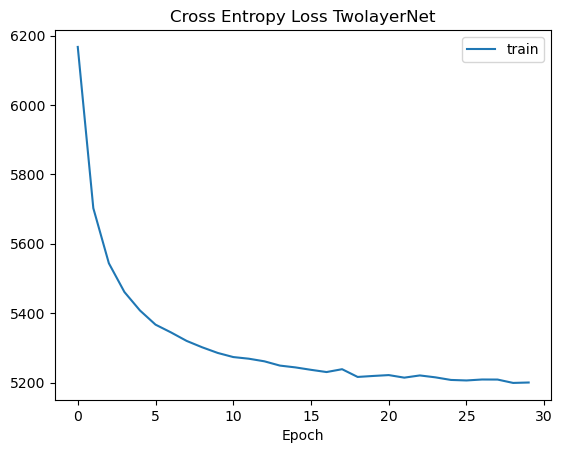

In [14]:
#size of image representation
tln_model = TwolayerNet(3072, 128, 100)
train(tln_model, trainloader, 30)

*train ConvNet*

Epoch: 0. Training data loss:  6290.88720703125
Epoch: 1. Training data loss:  5738.25634765625
Epoch: 2. Training data loss:  5515.04736328125
Epoch: 3. Training data loss:  5367.26513671875
Epoch: 4. Training data loss:  5258.28857421875
Epoch: 5. Training data loss:  5175.8447265625
Epoch: 6. Training data loss:  5103.52294921875
Epoch: 7. Training data loss:  5038.1005859375
Epoch: 8. Training data loss:  4987.4169921875
Epoch: 9. Training data loss:  4946.38525390625
Epoch: 10. Training data loss:  4907.9833984375
Epoch: 11. Training data loss:  4871.5400390625
Epoch: 12. Training data loss:  4838.54736328125
Epoch: 13. Training data loss:  4805.322265625
Epoch: 14. Training data loss:  4780.8994140625
Epoch: 15. Training data loss:  4750.45458984375
Epoch: 16. Training data loss:  4723.99951171875
Epoch: 17. Training data loss:  4701.31396484375
Epoch: 18. Training data loss:  4676.8173828125
Epoch: 19. Training data loss:  4653.60546875
Epoch: 20. Training data loss:  4637.12548

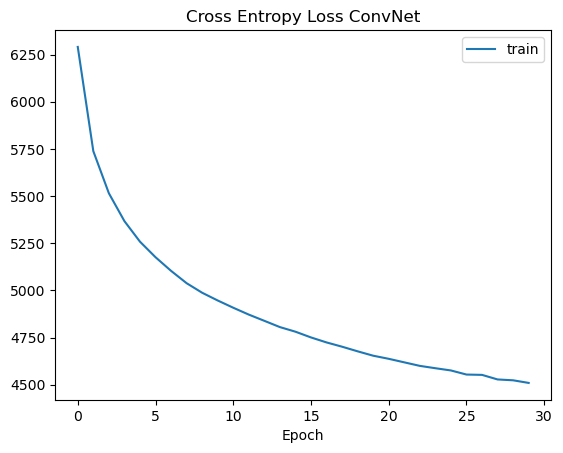

In [19]:
cnn_model = ConvNet()
train(cnn_model, trainloader, 30)

In [9]:
def valid(net,testloader):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)   
            net.eval()
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
    string = 'Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total)
    val = 100 * correct / total
    return string, val

In [8]:
def valid_class(net,testloader,classes):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    class_correct = list(0. for i in range(len(classes)))
    class_total = list(0. for i in range(len(classes)))
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)
            
            net.eval()
            outputs = net(images)
            _, predicted = torch.max(outputs, 1)
            c = (predicted == labels).squeeze()
            for i in range(len(labels)):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1
    outputs=[]
    for i in range(len(classes)):
        outputs.append('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))
    return outputs

In [10]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='latin')
    return dict

In [15]:
classes = unpickle(path3).get('fine_label_names')

#trainee = unpickle(path1).get('data')
#print(trainee)

print(valid(tln_model,testloader))
valid_class(tln_model,testloader,classes)

('Accuracy of the network on the 10000 test images: 19 %', 19.43)


['Accuracy of apple : 42 %',
 'Accuracy of aquarium_fish : 38 %',
 'Accuracy of  baby : 22 %',
 'Accuracy of  bear : 15 %',
 'Accuracy of beaver : 27 %',
 'Accuracy of   bed : 23 %',
 'Accuracy of   bee :  9 %',
 'Accuracy of beetle : 12 %',
 'Accuracy of bicycle : 21 %',
 'Accuracy of bottle : 32 %',
 'Accuracy of  bowl :  8 %',
 'Accuracy of   boy :  2 %',
 'Accuracy of bridge :  6 %',
 'Accuracy of   bus :  9 %',
 'Accuracy of butterfly :  7 %',
 'Accuracy of camel : 11 %',
 'Accuracy of   can :  3 %',
 'Accuracy of castle : 38 %',
 'Accuracy of caterpillar : 19 %',
 'Accuracy of cattle : 10 %',
 'Accuracy of chair : 37 %',
 'Accuracy of chimpanzee : 25 %',
 'Accuracy of clock : 16 %',
 'Accuracy of cloud : 53 %',
 'Accuracy of cockroach : 27 %',
 'Accuracy of couch :  2 %',
 'Accuracy of  crab :  9 %',
 'Accuracy of crocodile :  5 %',
 'Accuracy of   cup : 12 %',
 'Accuracy of dinosaur : 11 %',
 'Accuracy of dolphin : 50 %',
 'Accuracy of elephant : 23 %',
 'Accuracy of flatfish : 

In [24]:
print(valid(cnn_model,testloader))
valid_class(cnn_model,testloader,classes)

('Accuracy of the network on the 10000 test images: 26 %', 26.41)


['Accuracy of apple : 44 %',
 'Accuracy of aquarium_fish : 44 %',
 'Accuracy of  baby : 11 %',
 'Accuracy of  bear :  5 %',
 'Accuracy of beaver : 12 %',
 'Accuracy of   bed : 23 %',
 'Accuracy of   bee : 23 %',
 'Accuracy of beetle : 25 %',
 'Accuracy of bicycle : 23 %',
 'Accuracy of bottle : 47 %',
 'Accuracy of  bowl :  4 %',
 'Accuracy of   boy :  6 %',
 'Accuracy of bridge : 22 %',
 'Accuracy of   bus : 26 %',
 'Accuracy of butterfly : 10 %',
 'Accuracy of camel : 23 %',
 'Accuracy of   can : 18 %',
 'Accuracy of castle : 48 %',
 'Accuracy of caterpillar : 22 %',
 'Accuracy of cattle :  9 %',
 'Accuracy of chair : 59 %',
 'Accuracy of chimpanzee : 44 %',
 'Accuracy of clock : 18 %',
 'Accuracy of cloud : 60 %',
 'Accuracy of cockroach : 56 %',
 'Accuracy of couch : 15 %',
 'Accuracy of  crab : 22 %',
 'Accuracy of crocodile : 19 %',
 'Accuracy of   cup : 19 %',
 'Accuracy of dinosaur : 19 %',
 'Accuracy of dolphin : 27 %',
 'Accuracy of elephant : 27 %',
 'Accuracy of flatfish : 

# 1.4 Setting up the hyperparameters

Some parameters must be set properly before the training of CNNs. These parameters shape the training procedure. They determine how many images are to be processed at each step, how much the weights of the network will be updated, how many iterations will the network run until convergence.  These parameters are called hyperparameters in the machine learning literature. 

####  **` Q1.4: Setting up the hyperparameters (10-pts)`**  

1. Play with ConvNet and TwolayerNet yourself, set up the hyperparameters, and reach the accuracy as high as you can.
You can modify the *train*,  *Dataloader*, *transform* and *Optimizer* function as you like. You can also modify the architectures of these two Nets. 

2. *Let's add 2 more layers in TwolayerNet and ConvNet, and show the results. (You can decide the size of these layers and where to add them.) Will you get higher performances? explain why.*
 
3.  Show the final results and described what you've done to improve the results. Describe and explain the influence of hyperparameters among *TwolayerNet* and *ConvNet*.

4. Compare and explain the differences of these two networks regarding the architecture, performances, and learning rates. 

**Hint:** You can adjust the following parameters and other parameters not listed as you like: *Learning rate, Batch size, Number of epochs, Optimizer, Transform function, Weight decay etc.* You can also change the structure a bit, for instance, adding Batch Normalization layers. Please do not use external well-defined networks and please do not add more than 3 additional (beyond the original network) convolutional layers.

#### *`Play with convNet and TwolayerNet, set up the hyperparameters and reach the accuracy as high as you can`*

In [25]:
#Changes made on
    #Transform function
    #Random Search : Learning rate, Weight decay, Batch size, Number of epochs, Optimizer and Loss Function
#Custom function with changeable hyperparameters

In [16]:
def train2(net, trainloader,hyperparam):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    epochs, lr, wd, loss_function, current_optimizer= hyperparam
    if current_optimizer==1:
        optimizer = optim.Adam(net.parameters(), lr=lr, weight_decay=wd)
    else:
        optimizer = optim.Adadelta(net.parameters(), lr=lr, weight_decay=wd)
    net.to(device)
    t_ls=[]
    
    #one epoch -> processing all data once
    for epoch in range(epochs):  
        loss_ep = 0
        net.train()
        
        #iterating through batches
        for x, l in trainloader:
            x=x.to(device)
            l=l.to(device)
            net.zero_grad()
            optimizer.zero_grad()

            ## Make predictions for this batch
            tag_scores = net(x)
            
            # Compute the loss and its gradients, save the current value
            loss = loss_function(tag_scores, l)
            loss_ep+=loss
            loss.backward()
            
            # Adjust learning weights
            optimizer.step()
            
        print("Epoch: " + str(epoch) + ". Training data loss: ", loss_ep.item())
        t_ls.append(loss_ep)

    # print('Finished Training')
    # plt.title('Cross Entropy Loss {}'.format(type(net).__name__))
    # plt.xlabel('Epoch')
    # if torch.cuda.is_available():
    #     t_ls = torch.tensor(t_ls, device = 'cpu') 
    # plt.plot(t_ls.
    #          numpy(),label="train")
    # plt.legend()
    # plt.show()

In [17]:
def get_loaders(batch_sz, transform_train, transform_test):
    transformed_train = CIFAR100_loader(path1, transform = transform_train)
    trainloader = DataLoader(transformed_train, batch_size=batch_sz, shuffle=True, num_workers=2)

    transformed_test= CIFAR100_loader(path2, transform = transform_test)
    testloader = DataLoader(transformed_test, batch_size=batch_sz, shuffle=True, num_workers=2)
    return trainloader, testloader

def valid_both(net,testloader,classes):
    final = valid_class(net,testloader,classes)
    string, val = valid(net,testloader)
    final.append(string)
    return final, val

In [18]:
#modified transform: added Horizontal and Vertical flip for rubustness of model, changed with optimal CIFAR-100 values
transform_train = transform_train = transforms.Compose(
    [transforms.ToPILImage(),
     transforms.RandomHorizontalFlip(),
     transforms.RandomVerticalFlip(),
     transforms.ToTensor(),
     transforms.Normalize((0.5071, 0.4867, 0.4408), (0.2675, 0.2565, 0.2761))])

transform_test = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5071, 0.4867, 0.4408), (0.2675, 0.2565, 0.2761))])

In [19]:
param_dist = {
    'epoch':list(range(20, 80, 20)),
    'lr': [0.1, 0.01, 0.001, 0.0001],
    'wd': [0,0.01,0.3, 0.001],
    'loss_function':[nn.CrossEntropyLoss(),nn.MultiMarginLoss()],
    'batch_size':[10,32,64,128],
    'optimizers':[0, 1]
}

In [20]:
def get_random_config(parameter_distribution):
    config = []
    for key in parameter_distribution.keys():
        pos_val = parameter_distribution.get(key)
        config.append(random.choice(pos_val))
    return tuple(config)

In [21]:
def rand_search(model_type,param_dist, classes, n_iter):
    best_acc = 0
    best_config=()
    output=[]
    for i in range(n_iter):
        if model_type == 'cnn':
            model = ConvNet()
        elif model_type == 'tln':
            model = TwolayerNet(3072, 128, 100)
        elif model_type == 'cnn2':
            model = ConvNet_2()
        elif model_type == 'mln':
            model = MultiLayerNet(3072, 128, 100)
        print('Starting iteration, {}'.format(i))
        epoch, lr, wd, loss_fc, batch_sz, optim = get_random_config(param_dist)
        hyper_net = (epoch, lr, wd, loss_fc, optim)
        trainloader, testloader = get_loaders(batch_sz, transform_train, transform_test)
        train2(model, trainloader, hyper_net)
        strings, acc = valid_both(model, testloader, classes)
        if acc > best_acc:
            best_acc = acc
            best_config = (epoch, lr, wd, loss_fc, batch_sz, optim)
            output = strings
        print('Accuracy found: {}'.format(acc))
        print(epoch, lr, wd, loss_fc, batch_sz, optim)
    return best_acc, best_config

#### *` Add layers `*

In [22]:
class ConvNet_2(nn.Module):
    # Complete the code using LeNet-5
    # reference: https://ieeexplore.ieee.org/document/726791
    def __init__(self):
        super(ConvNet_2, self).__init__()
        self.C1 = nn.Conv2d(3, 6, 5)
        self.BN2 = nn.BatchNorm2d(6)
        self.S3 = nn.AvgPool2d(2,2)
        self.C4 = nn.Conv2d(6, 16, 5)
        self.S5 = nn.AvgPool2d(2,2)
        self.F6 = nn.Linear(400, 120, 5)
        self.F7 = nn.Linear(120, 84)
        self.D8 = nn.Dropout(0.4)
        self.out = nn.Linear(84, 100)
        
    def forward(self, x):
        x = self.BN2(self.C1(x))
        x = F.leaky_relu(x)
        x = self.S3(x)
        x = F.leaky_relu(self.C4(x))
        x = self.S5(x)
        
        #flatten before linear layers
        x = x.view(x.size(0), -1)
        x = F.leaky_relu(self.F6(x))
        x = F.leaky_relu(self.F7(x))
        x = self.D8(x)
        x = self.out(x)
        
        return x

In [23]:
class MultiLayerNet(nn.Module):
    # assign layer objects to class attributes
    # nn.init package contains convenient initialization methods
    # http://pytorch.org/docs/master/nn.html#torch-nn-init
    def __init__(self,input_size ,hidden_size ,num_classes ):
        '''
        :param input_size: 3*32*32
        :param hidden_size: 
        :param num_classes: 
        '''
        super(MultiLayerNet, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_classes = num_classes
        self.F1 = nn.Linear(input_size, hidden_size)
        self.BN2 = nn.BatchNorm1d(hidden_size)
        self.D3 = nn.Dropout(0.4)
        self.F4 = nn.Linear(hidden_size, 64)
        self.F5 = nn.Linear(64, num_classes)
        
        ##########################Inialization#############################
        # Xavier/Glorot initialization for linear layers
        init.xavier_uniform_(self.F1.weight)
        init.xavier_uniform_(self.F4.weight)
        init.xavier_uniform_(self.F5.weight)

        # Zero initialization for biases
        init.zeros_(self.F1.bias)
        init.zeros_(self.F4.bias)
        init.zeros_(self.F5.bias)

        # Constant initialization for batch normalization layer
        init.constant_(self.BN2.weight, 1)
        init.constant_(self.BN2.bias, 0)
        #################################################################
        
    def forward(self,x):
        # the input is flatten
#         device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#         x.to(device)
        x = x.view(x.shape[0], -1)
        x = self.BN2(self.F1(x))
        x = F.leaky_relu(x)
        x = self.D3(x)
        x = F.leaky_relu(self.F4(x))
        scores = self.F5(x)
        return scores

Epoch: 0. Training data loss:  6481.53369140625
Epoch: 1. Training data loss:  6080.34814453125
Epoch: 2. Training data loss:  5979.89794921875
Epoch: 3. Training data loss:  5917.36328125
Epoch: 4. Training data loss:  5875.8994140625
Epoch: 5. Training data loss:  5846.34130859375
Epoch: 6. Training data loss:  5815.49853515625
Epoch: 7. Training data loss:  5795.3818359375
Epoch: 8. Training data loss:  5789.66650390625
Epoch: 9. Training data loss:  5769.7685546875
Epoch: 10. Training data loss:  5756.2568359375
Epoch: 11. Training data loss:  5749.890625
Epoch: 12. Training data loss:  5747.79541015625
Epoch: 13. Training data loss:  5728.4853515625
Epoch: 14. Training data loss:  5733.44873046875
Epoch: 15. Training data loss:  5730.7939453125
Epoch: 16. Training data loss:  5719.669921875
Epoch: 17. Training data loss:  5714.158203125
Epoch: 18. Training data loss:  5712.0634765625
Epoch: 19. Training data loss:  5706.6533203125
Epoch: 20. Training data loss:  5705.689453125
Epo

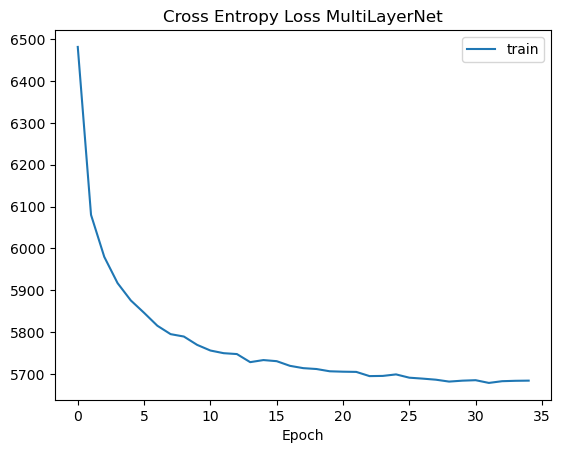

In [24]:
model_mln = MultiLayerNet(3072, 128, 100)
train(model_mln, trainloader, 35)

Epoch: 0. Training data loss:  6527.65966796875
Epoch: 1. Training data loss:  6036.203125
Epoch: 2. Training data loss:  5817.775390625
Epoch: 3. Training data loss:  5664.41748046875
Epoch: 4. Training data loss:  5560.21484375
Epoch: 5. Training data loss:  5479.48193359375
Epoch: 6. Training data loss:  5416.36669921875
Epoch: 7. Training data loss:  5374.66064453125
Epoch: 8. Training data loss:  5344.7939453125
Epoch: 9. Training data loss:  5311.9306640625
Epoch: 10. Training data loss:  5280.85107421875
Epoch: 11. Training data loss:  5246.8046875
Epoch: 12. Training data loss:  5216.41845703125
Epoch: 13. Training data loss:  5183.20751953125
Epoch: 14. Training data loss:  5159.96337890625
Epoch: 15. Training data loss:  5127.01513671875
Epoch: 16. Training data loss:  5111.9482421875
Epoch: 17. Training data loss:  5098.5859375
Epoch: 18. Training data loss:  5086.06640625
Epoch: 19. Training data loss:  5060.2890625
Epoch: 20. Training data loss:  5050.97216796875
Epoch: 21

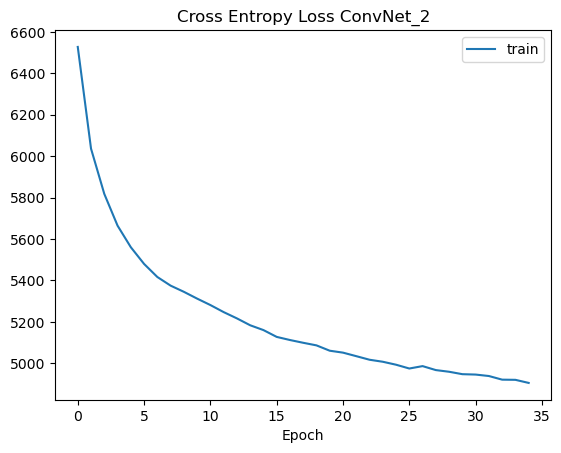

In [35]:
cnn2_model = ConvNet_2()
train(cnn2_model, trainloader, 35)

In [36]:
print(valid(model_mln,testloader))
valid_class(model_mln,testloader,classes)


('Accuracy of the network on the 10000 test images: 17 %', 17.76)


['Accuracy of apple : 40 %',
 'Accuracy of aquarium_fish : 34 %',
 'Accuracy of  baby :  3 %',
 'Accuracy of  bear : 34 %',
 'Accuracy of beaver :  9 %',
 'Accuracy of   bed : 18 %',
 'Accuracy of   bee : 15 %',
 'Accuracy of beetle : 19 %',
 'Accuracy of bicycle :  9 %',
 'Accuracy of bottle : 27 %',
 'Accuracy of  bowl :  1 %',
 'Accuracy of   boy :  2 %',
 'Accuracy of bridge :  4 %',
 'Accuracy of   bus :  0 %',
 'Accuracy of butterfly : 12 %',
 'Accuracy of camel :  0 %',
 'Accuracy of   can : 16 %',
 'Accuracy of castle : 27 %',
 'Accuracy of caterpillar : 13 %',
 'Accuracy of cattle : 11 %',
 'Accuracy of chair : 34 %',
 'Accuracy of chimpanzee : 24 %',
 'Accuracy of clock : 12 %',
 'Accuracy of cloud : 46 %',
 'Accuracy of cockroach : 51 %',
 'Accuracy of couch :  4 %',
 'Accuracy of  crab :  5 %',
 'Accuracy of crocodile : 14 %',
 'Accuracy of   cup : 13 %',
 'Accuracy of dinosaur :  1 %',
 'Accuracy of dolphin : 53 %',
 'Accuracy of elephant : 13 %',
 'Accuracy of flatfish : 

In [37]:
print(valid(cnn2_model,testloader))
valid_class(cnn2_model,testloader,classes)

('Accuracy of the network on the 10000 test images: 26 %', 26.57)


['Accuracy of apple : 50 %',
 'Accuracy of aquarium_fish : 49 %',
 'Accuracy of  baby : 12 %',
 'Accuracy of  bear : 10 %',
 'Accuracy of beaver : 24 %',
 'Accuracy of   bed : 10 %',
 'Accuracy of   bee : 32 %',
 'Accuracy of beetle : 27 %',
 'Accuracy of bicycle : 29 %',
 'Accuracy of bottle : 29 %',
 'Accuracy of  bowl : 14 %',
 'Accuracy of   boy :  8 %',
 'Accuracy of bridge : 25 %',
 'Accuracy of   bus : 25 %',
 'Accuracy of butterfly : 18 %',
 'Accuracy of camel : 22 %',
 'Accuracy of   can : 13 %',
 'Accuracy of castle : 60 %',
 'Accuracy of caterpillar : 44 %',
 'Accuracy of cattle :  2 %',
 'Accuracy of chair : 52 %',
 'Accuracy of chimpanzee : 49 %',
 'Accuracy of clock : 20 %',
 'Accuracy of cloud : 65 %',
 'Accuracy of cockroach : 68 %',
 'Accuracy of couch : 22 %',
 'Accuracy of  crab :  4 %',
 'Accuracy of crocodile : 17 %',
 'Accuracy of   cup : 31 %',
 'Accuracy of dinosaur : 19 %',
 'Accuracy of dolphin : 39 %',
 'Accuracy of elephant : 14 %',
 'Accuracy of flatfish : 

In [38]:
summary(cnn2_model, (3, 32, 32))
summary(model_mln, (3, 32, 32))

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 6, 28, 28]           456
├─BatchNorm2d: 1-2                       [-1, 6, 28, 28]           12
├─AvgPool2d: 1-3                         [-1, 6, 14, 14]           --
├─Conv2d: 1-4                            [-1, 16, 10, 10]          2,416
├─AvgPool2d: 1-5                         [-1, 16, 5, 5]            --
├─Linear: 1-6                            [-1, 120]                 48,120
├─Linear: 1-7                            [-1, 84]                  10,164
├─Dropout: 1-8                           [-1, 84]                  --
├─Linear: 1-9                            [-1, 100]                 8,500
Total params: 69,668
Trainable params: 69,668
Non-trainable params: 0
Total mult-adds (M): 0.66
Input size (MB): 0.01
Forward/backward pass size (MB): 0.09
Params size (MB): 0.27
Estimated Total Size (MB): 0.36
Layer (type:depth-idx)                   Output Shape              Pa

Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [-1, 128]                 393,344
├─BatchNorm1d: 1-2                       [-1, 128]                 256
├─Dropout: 1-3                           [-1, 128]                 --
├─Linear: 1-4                            [-1, 64]                  8,256
├─Linear: 1-5                            [-1, 100]                 6,500
Total params: 408,356
Trainable params: 408,356
Non-trainable params: 0
Total mult-adds (M): 0.41
Input size (MB): 0.01
Forward/backward pass size (MB): 0.00
Params size (MB): 1.56
Estimated Total Size (MB): 1.57

Runing Random Search on all 4 models

In [27]:
print(rand_search('cnn',param_dist, classes, 30))

Starting iteration, 0
Epoch: 0. Training data loss:  3383.245361328125
Epoch: 1. Training data loss:  3256.18017578125
Epoch: 2. Training data loss:  3205.184814453125
Epoch: 3. Training data loss:  3171.470458984375
Epoch: 4. Training data loss:  3144.24853515625
Epoch: 5. Training data loss:  3128.993408203125
Epoch: 6. Training data loss:  3119.153076171875
Epoch: 7. Training data loss:  3112.392822265625
Epoch: 8. Training data loss:  3106.319580078125
Epoch: 9. Training data loss:  3104.394775390625
Epoch: 10. Training data loss:  3098.102294921875
Epoch: 11. Training data loss:  3081.782958984375
Epoch: 12. Training data loss:  3091.537353515625
Epoch: 13. Training data loss:  3073.482421875
Epoch: 14. Training data loss:  3074.66162109375
Epoch: 15. Training data loss:  3072.939453125
Epoch: 16. Training data loss:  3068.962646484375
Epoch: 17. Training data loss:  3060.89990234375
Epoch: 18. Training data loss:  3061.76318359375
Epoch: 19. Training data loss:  3070.16650390625


/home/carol/anaconda3/lib/python3.9/site-packages/torch/autograd/__init__.py:197: UserWarning: An output with one or more elements was resized since it had shape [], which does not match the required output shape [10, 100]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at /opt/conda/conda-bld/pytorch_1670525539683/work/aten/src/ATen/native/Resize.cpp:17.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Epoch: 0. Training data loss:  5686.49072265625
Epoch: 1. Training data loss:  5802.82177734375
Epoch: 2. Training data loss:  5720.640625
Epoch: 3. Training data loss:  8140.10693359375
Epoch: 4. Training data loss:  5956.185546875
Epoch: 5. Training data loss:  5933.30810546875
Epoch: 6. Training data loss:  6054.74169921875
Epoch: 7. Training data loss:  6005.53955078125
Epoch: 8. Training data loss:  7223.82666015625
Epoch: 9. Training data loss:  6967.765625
Epoch: 10. Training data loss:  6080.21484375
Epoch: 11. Training data loss:  6224.810546875
Epoch: 12. Training data loss:  6425.63720703125
Epoch: 13. Training data loss:  6448.146484375
Epoch: 14. Training data loss:  6202.07763671875
Epoch: 15. Training data loss:  6449.3623046875
Epoch: 16. Training data loss:  6677.62890625
Epoch: 17. Training data loss:  6104.10888671875
Epoch: 18. Training data loss:  5937.67333984375
Epoch: 19. Training data loss:  6468.13916015625
Accuracy found: 3.14
20 0.01 0 MultiMarginLoss() 10 1

/home/carol/anaconda3/lib/python3.9/site-packages/torch/autograd/__init__.py:197: UserWarning: An output with one or more elements was resized since it had shape [], which does not match the required output shape [128, 100]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at /opt/conda/conda-bld/pytorch_1670525539683/work/aten/src/ATen/native/Resize.cpp:17.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Epoch: 0. Training data loss:  387.0663146972656


/home/carol/anaconda3/lib/python3.9/site-packages/torch/autograd/__init__.py:197: UserWarning: An output with one or more elements was resized since it had shape [], which does not match the required output shape [80, 100]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at /opt/conda/conda-bld/pytorch_1670525539683/work/aten/src/ATen/native/Resize.cpp:17.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Epoch: 1. Training data loss:  387.121826171875
Epoch: 2. Training data loss:  387.1080017089844
Epoch: 3. Training data loss:  387.1147766113281
Epoch: 4. Training data loss:  387.1103210449219
Epoch: 5. Training data loss:  387.1205139160156
Epoch: 6. Training data loss:  387.1171875
Epoch: 7. Training data loss:  387.1141357421875
Epoch: 8. Training data loss:  387.119140625
Epoch: 9. Training data loss:  387.1056213378906
Epoch: 10. Training data loss:  387.1069030761719
Epoch: 11. Training data loss:  387.10382080078125
Epoch: 12. Training data loss:  387.1143798828125
Epoch: 13. Training data loss:  387.12060546875
Epoch: 14. Training data loss:  387.1211242675781
Epoch: 15. Training data loss:  387.119140625
Epoch: 16. Training data loss:  387.10626220703125
Epoch: 17. Training data loss:  387.1141357421875
Epoch: 18. Training data loss:  387.1117248535156
Epoch: 19. Training data loss:  387.1081848144531
Epoch: 20. Training data loss:  387.1223449707031
Epoch: 21. Training data

/home/carol/anaconda3/lib/python3.9/site-packages/torch/autograd/__init__.py:197: UserWarning: An output with one or more elements was resized since it had shape [], which does not match the required output shape [32, 100]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at /opt/conda/conda-bld/pytorch_1670525539683/work/aten/src/ATen/native/Resize.cpp:17.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
/home/carol/anaconda3/lib/python3.9/site-packages/torch/autograd/__init__.py:197: UserWarning: An output with one or more elements was resized since it had shape [], which does not match the required output shape [16, 100]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. Y

Epoch: 0. Training data loss:  1078.3450927734375
Epoch: 1. Training data loss:  1329.6683349609375
Epoch: 2. Training data loss:  1157.0615234375
Epoch: 3. Training data loss:  1096.3782958984375
Epoch: 4. Training data loss:  1092.595703125
Epoch: 5. Training data loss:  1092.9395751953125
Epoch: 6. Training data loss:  1324.6036376953125
Epoch: 7. Training data loss:  1317.08203125
Epoch: 8. Training data loss:  1281.5523681640625
Epoch: 9. Training data loss:  1109.228759765625
Epoch: 10. Training data loss:  1106.516845703125
Epoch: 11. Training data loss:  1131.8765869140625
Epoch: 12. Training data loss:  1161.1214599609375
Epoch: 13. Training data loss:  1122.2703857421875
Epoch: 14. Training data loss:  1080.681884765625
Epoch: 15. Training data loss:  1031.1123046875
Epoch: 16. Training data loss:  1192.9666748046875
Epoch: 17. Training data loss:  1091.271240234375
Epoch: 18. Training data loss:  1093.2066650390625
Epoch: 19. Training data loss:  1184.7755126953125
Epoch: 20

/home/carol/anaconda3/lib/python3.9/site-packages/torch/autograd/__init__.py:197: UserWarning: An output with one or more elements was resized since it had shape [], which does not match the required output shape [64, 100]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at /opt/conda/conda-bld/pytorch_1670525539683/work/aten/src/ATen/native/Resize.cpp:17.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Epoch: 0. Training data loss:  773.474853515625
Epoch: 1. Training data loss:  772.1598510742188
Epoch: 2. Training data loss:  770.791259765625
Epoch: 3. Training data loss:  769.2608642578125
Epoch: 4. Training data loss:  767.2986450195312
Epoch: 5. Training data loss:  764.9620971679688
Epoch: 6. Training data loss:  761.928955078125
Epoch: 7. Training data loss:  758.1475219726562
Epoch: 8. Training data loss:  753.4310302734375
Epoch: 9. Training data loss:  747.2982788085938
Epoch: 10. Training data loss:  739.5778198242188
Epoch: 11. Training data loss:  730.4500732421875
Epoch: 12. Training data loss:  719.528564453125
Epoch: 13. Training data loss:  707.4334716796875
Epoch: 14. Training data loss:  694.7566528320312
Epoch: 15. Training data loss:  682.4548950195312
Epoch: 16. Training data loss:  670.8936157226562
Epoch: 17. Training data loss:  660.4077758789062
Epoch: 18. Training data loss:  651.4174194335938
Epoch: 19. Training data loss:  643.1332397460938
Accuracy found

RuntimeError: cuDNN error: CUDNN_STATUS_MAPPING_ERROR

In [39]:
print(rand_search('cnn',param_dist, classes, 5))

Starting iteration, 0


/home/carol/anaconda3/lib/python3.9/site-packages/torch/autograd/__init__.py:197: UserWarning: An output with one or more elements was resized since it had shape [], which does not match the required output shape [10, 100]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at /opt/conda/conda-bld/pytorch_1670525539683/work/aten/src/ATen/native/Resize.cpp:17.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Epoch: 0. Training data loss:  4357.9130859375
Epoch: 1. Training data loss:  3657.0693359375
Epoch: 2. Training data loss:  3498.6259765625
Epoch: 3. Training data loss:  3442.236328125
Epoch: 4. Training data loss:  3415.665283203125
Epoch: 5. Training data loss:  3400.51904296875
Epoch: 6. Training data loss:  3392.177001953125
Epoch: 7. Training data loss:  3388.744384765625
Epoch: 8. Training data loss:  3378.097412109375
Epoch: 9. Training data loss:  3369.974609375
Epoch: 10. Training data loss:  3365.143310546875
Epoch: 11. Training data loss:  3360.560791015625
Epoch: 12. Training data loss:  3353.3359375
Epoch: 13. Training data loss:  3344.362548828125
Epoch: 14. Training data loss:  3334.498046875
Epoch: 15. Training data loss:  3323.3779296875
Epoch: 16. Training data loss:  3313.024658203125
Epoch: 17. Training data loss:  3306.869140625
Epoch: 18. Training data loss:  3296.20703125
Epoch: 19. Training data loss:  3285.71240234375
Epoch: 20. Training data loss:  3273.7780

/home/carol/anaconda3/lib/python3.9/site-packages/torch/autograd/__init__.py:197: UserWarning: An output with one or more elements was resized since it had shape [], which does not match the required output shape [32, 100]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at /opt/conda/conda-bld/pytorch_1670525539683/work/aten/src/ATen/native/Resize.cpp:17.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Epoch: 0. Training data loss:  1544.572998046875


/home/carol/anaconda3/lib/python3.9/site-packages/torch/autograd/__init__.py:197: UserWarning: An output with one or more elements was resized since it had shape [], which does not match the required output shape [16, 100]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at /opt/conda/conda-bld/pytorch_1670525539683/work/aten/src/ATen/native/Resize.cpp:17.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Epoch: 1. Training data loss:  1545.61279296875
Epoch: 2. Training data loss:  1546.91943359375
Epoch: 3. Training data loss:  1547.299560546875
Epoch: 4. Training data loss:  1547.3594970703125
Epoch: 5. Training data loss:  1547.37451171875
Epoch: 6. Training data loss:  1547.378173828125
Epoch: 7. Training data loss:  1547.3736572265625
Epoch: 8. Training data loss:  1547.379638671875
Epoch: 9. Training data loss:  1547.3721923828125
Epoch: 10. Training data loss:  1547.374755859375
Epoch: 11. Training data loss:  1547.3712158203125
Epoch: 12. Training data loss:  1547.373046875
Epoch: 13. Training data loss:  1547.3681640625
Epoch: 14. Training data loss:  1547.3671875
Epoch: 15. Training data loss:  1547.3743896484375
Epoch: 16. Training data loss:  1547.3746337890625
Epoch: 17. Training data loss:  1547.3756103515625
Epoch: 18. Training data loss:  1547.3704833984375
Epoch: 19. Training data loss:  1547.3740234375
Accuracy found: 1.0
20 0.001 0.3 MultiMarginLoss() 32 0
Starting i

In [40]:
print(rand_search('tln',param_dist, classes, 30))

Starting iteration, 0
Epoch: 0. Training data loss:  1459.75439453125
Epoch: 1. Training data loss:  1337.322509765625
Epoch: 2. Training data loss:  1261.29296875
Epoch: 3. Training data loss:  1206.3465576171875
Epoch: 4. Training data loss:  1166.3037109375
Epoch: 5. Training data loss:  1129.4825439453125
Epoch: 6. Training data loss:  1097.373291015625
Epoch: 7. Training data loss:  1070.7666015625
Epoch: 8. Training data loss:  1045.984619140625
Epoch: 9. Training data loss:  1023.3833618164062
Epoch: 10. Training data loss:  1003.4993286132812
Epoch: 11. Training data loss:  985.766845703125
Epoch: 12. Training data loss:  972.1051635742188
Epoch: 13. Training data loss:  957.6221923828125
Epoch: 14. Training data loss:  946.2266845703125
Epoch: 15. Training data loss:  933.6317138671875
Epoch: 16. Training data loss:  920.5033569335938
Epoch: 17. Training data loss:  910.262451171875
Epoch: 18. Training data loss:  902.8070678710938
Epoch: 19. Training data loss:  893.033630371

/home/carol/anaconda3/lib/python3.9/site-packages/torch/autograd/__init__.py:197: UserWarning: An output with one or more elements was resized since it had shape [], which does not match the required output shape [128, 100]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at /opt/conda/conda-bld/pytorch_1670525539683/work/aten/src/ATen/native/Resize.cpp:17.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
/home/carol/anaconda3/lib/python3.9/site-packages/torch/autograd/__init__.py:197: UserWarning: An output with one or more elements was resized since it had shape [], which does not match the required output shape [80, 100]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. 

Epoch: 0. Training data loss:  359.1629638671875
Epoch: 1. Training data loss:  369.9282531738281
Epoch: 2. Training data loss:  355.68817138671875
Epoch: 3. Training data loss:  359.4193115234375
Epoch: 4. Training data loss:  356.3942565917969
Epoch: 5. Training data loss:  358.9566955566406
Epoch: 6. Training data loss:  358.12261962890625
Epoch: 7. Training data loss:  356.73876953125
Epoch: 8. Training data loss:  363.5995788574219
Epoch: 9. Training data loss:  357.6102600097656
Epoch: 10. Training data loss:  363.17047119140625
Epoch: 11. Training data loss:  369.6217956542969
Epoch: 12. Training data loss:  360.6918029785156
Epoch: 13. Training data loss:  359.0041809082031
Epoch: 14. Training data loss:  359.0165710449219
Epoch: 15. Training data loss:  363.46820068359375
Epoch: 16. Training data loss:  357.5591125488281
Epoch: 17. Training data loss:  362.93096923828125
Epoch: 18. Training data loss:  358.6981201171875
Epoch: 19. Training data loss:  361.39385986328125
Epoch:

/home/carol/anaconda3/lib/python3.9/site-packages/torch/autograd/__init__.py:197: UserWarning: An output with one or more elements was resized since it had shape [], which does not match the required output shape [64, 100]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at /opt/conda/conda-bld/pytorch_1670525539683/work/aten/src/ATen/native/Resize.cpp:17.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Epoch: 0. Training data loss:  736.576171875
Epoch: 1. Training data loss:  671.873291015625
Epoch: 2. Training data loss:  632.4443359375
Epoch: 3. Training data loss:  604.5315551757812
Epoch: 4. Training data loss:  582.8593139648438
Epoch: 5. Training data loss:  564.5211181640625
Epoch: 6. Training data loss:  548.109375
Epoch: 7. Training data loss:  534.0819091796875
Epoch: 8. Training data loss:  520.609130859375
Epoch: 9. Training data loss:  510.0650634765625
Epoch: 10. Training data loss:  499.1435546875
Epoch: 11. Training data loss:  490.3523254394531
Epoch: 12. Training data loss:  482.46051025390625
Epoch: 13. Training data loss:  473.6665344238281
Epoch: 14. Training data loss:  466.6354064941406
Epoch: 15. Training data loss:  460.0693054199219
Epoch: 16. Training data loss:  453.7813415527344
Epoch: 17. Training data loss:  448.30572509765625
Epoch: 18. Training data loss:  443.3452453613281
Epoch: 19. Training data loss:  438.2219543457031
Epoch: 20. Training data lo

In [41]:
print(rand_search('mln',param_dist, classes, 30))

Starting iteration, 0
Epoch: 0. Training data loss:  37156656.0
Epoch: 1. Training data loss:  31100416.0
Epoch: 2. Training data loss:  71011656.0
Epoch: 3. Training data loss:  88432304.0
Epoch: 4. Training data loss:  134198672.0
Epoch: 5. Training data loss:  179986416.0
Epoch: 6. Training data loss:  166815296.0
Epoch: 7. Training data loss:  154176688.0
Epoch: 8. Training data loss:  257930224.0
Epoch: 9. Training data loss:  135425328.0
Epoch: 10. Training data loss:  146105072.0
Epoch: 11. Training data loss:  189600800.0
Epoch: 12. Training data loss:  184277376.0
Epoch: 13. Training data loss:  568846464.0
Epoch: 14. Training data loss:  1003298240.0
Epoch: 15. Training data loss:  1431583488.0
Epoch: 16. Training data loss:  442635904.0
Epoch: 17. Training data loss:  810659392.0
Epoch: 18. Training data loss:  299015616.0
Epoch: 19. Training data loss:  257196208.0
Epoch: 20. Training data loss:  198378656.0
Epoch: 21. Training data loss:  257136752.0
Epoch: 22. Training da

In [25]:
print(rand_search('cnn2',param_dist, classes, 30))

Starting iteration, 0


/home/carol/anaconda3/lib/python3.9/site-packages/torch/autograd/__init__.py:197: UserWarning: An output with one or more elements was resized since it had shape [], which does not match the required output shape [128, 100]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at /opt/conda/conda-bld/pytorch_1670525539683/work/aten/src/ATen/native/Resize.cpp:17.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Epoch: 0. Training data loss:  2720794.25


/home/carol/anaconda3/lib/python3.9/site-packages/torch/autograd/__init__.py:197: UserWarning: An output with one or more elements was resized since it had shape [], which does not match the required output shape [80, 100]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at /opt/conda/conda-bld/pytorch_1670525539683/work/aten/src/ATen/native/Resize.cpp:17.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Epoch: 1. Training data loss:  3486765809664.0
Epoch: 2. Training data loss:  100631008247808.0
Epoch: 3. Training data loss:  278058665771008.0
Epoch: 4. Training data loss:  304886709223424.0
Epoch: 5. Training data loss:  548464102473728.0
Epoch: 6. Training data loss:  752293519556608.0
Epoch: 7. Training data loss:  1686764385206272.0
Epoch: 8. Training data loss:  1808727363551232.0
Epoch: 9. Training data loss:  1779023235514368.0
Epoch: 10. Training data loss:  1432573456678912.0
Epoch: 11. Training data loss:  1379921989468160.0
Epoch: 12. Training data loss:  1336105672638464.0
Epoch: 13. Training data loss:  1130120249081856.0
Epoch: 14. Training data loss:  964702469357568.0
Epoch: 15. Training data loss:  760038285115392.0
Epoch: 16. Training data loss:  523457024491520.0
Epoch: 17. Training data loss:  502805144010752.0
Epoch: 18. Training data loss:  427652712235008.0
Epoch: 19. Training data loss:  384280555421696.0
Accuracy found: 1.0
20 0.1 0 MultiMarginLoss() 128 1
S

/home/carol/anaconda3/lib/python3.9/site-packages/torch/autograd/__init__.py:197: UserWarning: An output with one or more elements was resized since it had shape [], which does not match the required output shape [10, 100]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at /opt/conda/conda-bld/pytorch_1670525539683/work/aten/src/ATen/native/Resize.cpp:17.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Epoch: 0. Training data loss:  4948.95849609375
Epoch: 1. Training data loss:  4946.5546875
Epoch: 2. Training data loss:  4942.55908203125
Epoch: 3. Training data loss:  4939.14697265625
Epoch: 4. Training data loss:  4933.81298828125
Epoch: 5. Training data loss:  4922.79931640625
Epoch: 6. Training data loss:  4905.4560546875
Epoch: 7. Training data loss:  4865.3974609375
Epoch: 8. Training data loss:  4792.05126953125
Epoch: 9. Training data loss:  4705.30859375
Epoch: 10. Training data loss:  4632.21240234375
Epoch: 11. Training data loss:  4548.27587890625
Epoch: 12. Training data loss:  4450.84912109375
Epoch: 13. Training data loss:  4340.814453125
Epoch: 14. Training data loss:  4263.99560546875
Epoch: 15. Training data loss:  4215.439453125
Epoch: 16. Training data loss:  4175.9755859375
Epoch: 17. Training data loss:  4141.4375
Epoch: 18. Training data loss:  4113.98388671875
Epoch: 19. Training data loss:  4090.2998046875
Epoch: 20. Training data loss:  4061.123046875
Epoch

/home/carol/anaconda3/lib/python3.9/site-packages/torch/autograd/__init__.py:197: UserWarning: An output with one or more elements was resized since it had shape [], which does not match the required output shape [32, 100]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at /opt/conda/conda-bld/pytorch_1670525539683/work/aten/src/ATen/native/Resize.cpp:17.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Epoch: 0. Training data loss:  1216.5650634765625


/home/carol/anaconda3/lib/python3.9/site-packages/torch/autograd/__init__.py:197: UserWarning: An output with one or more elements was resized since it had shape [], which does not match the required output shape [16, 100]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at /opt/conda/conda-bld/pytorch_1670525539683/work/aten/src/ATen/native/Resize.cpp:17.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Epoch: 1. Training data loss:  2176.980224609375
Epoch: 2. Training data loss:  2245.508544921875
Epoch: 3. Training data loss:  1705.1134033203125
Epoch: 4. Training data loss:  4370.15625
Epoch: 5. Training data loss:  7313.20751953125
Epoch: 6. Training data loss:  5851.21240234375
Epoch: 7. Training data loss:  3356.233642578125
Epoch: 8. Training data loss:  2566.076904296875
Epoch: 9. Training data loss:  2473.469970703125
Epoch: 10. Training data loss:  2736.810791015625
Epoch: 11. Training data loss:  1786.5740966796875
Epoch: 12. Training data loss:  1377.926025390625
Epoch: 13. Training data loss:  1296.2530517578125
Epoch: 14. Training data loss:  1325.74560546875
Epoch: 15. Training data loss:  1308.225341796875
Epoch: 16. Training data loss:  1219.5855712890625
Epoch: 17. Training data loss:  1332.6802978515625
Epoch: 18. Training data loss:  1266.4031982421875
Epoch: 19. Training data loss:  1230.568603515625
Epoch: 20. Training data loss:  1360.2947998046875
Epoch: 21. T

/home/carol/anaconda3/lib/python3.9/site-packages/torch/autograd/__init__.py:197: UserWarning: An output with one or more elements was resized since it had shape [], which does not match the required output shape [64, 100]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at /opt/conda/conda-bld/pytorch_1670525539683/work/aten/src/ATen/native/Resize.cpp:17.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Epoch: 0. Training data loss:  773.3575439453125
Epoch: 1. Training data loss:  772.5415649414062
Epoch: 2. Training data loss:  772.033447265625
Epoch: 3. Training data loss:  771.1635131835938
Epoch: 4. Training data loss:  770.1806640625
Epoch: 5. Training data loss:  769.0689086914062
Epoch: 6. Training data loss:  767.5250854492188
Epoch: 7. Training data loss:  766.023193359375
Epoch: 8. Training data loss:  764.1390991210938
Epoch: 9. Training data loss:  761.3364868164062
Epoch: 10. Training data loss:  757.8060913085938
Epoch: 11. Training data loss:  754.3247680664062
Epoch: 12. Training data loss:  749.649658203125
Epoch: 13. Training data loss:  745.4552612304688
Epoch: 14. Training data loss:  741.2228393554688
Epoch: 15. Training data loss:  735.2282104492188
Epoch: 16. Training data loss:  729.5370483398438
Epoch: 17. Training data loss:  725.0995483398438
Epoch: 18. Training data loss:  717.8963623046875
Epoch: 19. Training data loss:  712.3663940429688
Epoch: 20. Train

## **Session 2:  Finetuning the ConvNet**
### 2.1 STL-10 DATASET
> The above networks are trained on CIFAR-100, which
contains the images of 100 different object categories, each of which has $32\times32 \times3$ dimensions. 
The dataset we use throughout this session is a subset of [STL-10](https://cs.stanford.edu/~acoates/stl10/)
with higher resolution and different object classes. So, there is a discrepancy between the previous dataset (CIFAR-100) and the new dataset (STL-10). One solution would be to train the whole network from scratch. However, the number of parameters is too large to be trained properly with such few images. Another way is to use the pre-trained network (on CIFAR-100) and then finetune the network on the new dataset (STL-10) (*e.g.*, use the same architectures in all layers except the output layer, as the number of output classes changes (from 100 to 5)).


In [ ]:
# Use the following codes if necessary
# referenced codes: https://cs.stanford.edu/~acoates/stl10/

from __future__ import print_function

import sys
import os, sys, tarfile, errno
import numpy as np
import matplotlib.pyplot as plt
    
if sys.version_info >= (3, 0, 0):
    import urllib.request as urllib
else:
    import urllib

try:
    from imageio import imsave
except:
    from scipy.misc import imsave

print(sys.version_info) 

# image shape
HEIGHT = 96
WIDTH = 96
DEPTH = 3

# size of a single image in bytes
SIZE = HEIGHT * WIDTH * DEPTH

# path to the directory with the data
DATA_DIR = './data'

# url of the binary data
DATA_URL = 'http://ai.stanford.edu/~acoates/stl10/stl10_binary.tar.gz'

# path to the binary train file with image data
DATA_PATH = './data/stl10_binary/train_X.bin'

# path to the binary train file with labels
LABEL_PATH = './data/stl10_binary/train_y.bin'

def read_labels(path_to_labels):
    """
    :param path_to_labels: path to the binary file containing labels from the STL-10 dataset
    :return: an array containing the labels
    """
    with open(path_to_labels, 'rb') as f:
        labels = np.fromfile(f, dtype=np.uint8)
        return labels


def read_all_images(path_to_data):
    """
    :param path_to_data: the file containing the binary images from the STL-10 dataset
    :return: an array containing all the images
    """

    with open(path_to_data, 'rb') as f:
        # read whole file in uint8 chunks
        everything = np.fromfile(f, dtype=np.uint8)

        # We force the data into 3x96x96 chunks, since the
        # images are stored in "column-major order", meaning
        # that "the first 96*96 values are the red channel,
        # the next 96*96 are green, and the last are blue."
        # The -1 is since the size of the pictures depends
        # on the input file, and this way numpy determines
        # the size on its own.

        images = np.reshape(everything, (-1, 3, 96, 96))

        # Now transpose the images into a standard image format
        # readable by, for example, matplotlib.imshow
        # You might want to comment this line or reverse the shuffle
        # if you will use a learning algorithm like CNN, since they like
        # their channels separated.
        images = np.transpose(images, (0, 3, 2, 1))
        return images


def read_single_image(image_file):
    """
    CAREFUL! - this method uses a file as input instead of the path - so the
    position of the reader will be remembered outside of context of this method.
    :param image_file: the open file containing the images
    :return: a single image
    """
    # read a single image, count determines the number of uint8's to read
    image = np.fromfile(image_file, dtype=np.uint8, count=SIZE)
    # force into image matrix
    image = np.reshape(image, (3, 96, 96))
    # transpose to standard format
    # You might want to comment this line or reverse the shuffle
    # if you will use a learning algorithm like CNN, since they like
    # their channels separated.
    image = np.transpose(image, (2, 1, 0))
    return image


def plot_image(image):
    """
    :param image: the image to be plotted in a 3-D matrix format
    :return: None
    """
    plt.imshow(image)
    plt.show()

def save_image(image, name):
    imsave("%s.png" % name, image, format="png")

def download_and_extract():
    """
    Download and extract the STL-10 dataset
    :return: None
    """
    dest_directory = DATA_DIR
    if not os.path.exists(dest_directory):
        os.makedirs(dest_directory)
    filename = DATA_URL.split('/')[-1]
    filepath = os.path.join(dest_directory, filename)
    if not os.path.exists(filepath):
        def _progress(count, block_size, total_size):
            sys.stdout.write('\rDownloading %s %.2f%%' % (filename,
                float(count * block_size) / float(total_size) * 100.0))
            sys.stdout.flush()
        filepath, _ = urllib.urlretrieve(DATA_URL, filepath, reporthook=_progress)
        print('Downloaded', filename)
        tarfile.open(filepath, 'r:gz').extractall(dest_directory)

def save_images(images, labels):
    print("Saving images to disk")
    i = 0
    for image in images:
        label = labels[i]
        directory = './img/' + str(label) + '/'
        try:
            os.makedirs(directory, exist_ok=True)
        except OSError as exc:
            if exc.errno == errno.EEXIST:
                pass
        filename = directory + str(i)
        print(filename)
        save_image(image, filename)
        i = i+1
    

In [ ]:
# download data if needed
download_and_extract()

# # test to check if the image is read correctly
with open(DATA_PATH) as f:
    image = read_single_image(f)
    plot_image(image)

# # test to check if the whole dataset is read correctly
images = read_all_images(DATA_PATH)
print(images.shape)

# labels = read_labels(LABEL_PATH)
print(labels.shape)

# # save images to disk
save_images(images, labels)

#### **`Q2.1 Create the STL10_Dataset (5-pts)`**
In this Session, download STL-10 and extract 5 classes from STL-10 training dataset. The the labels of images will be defined as: 

`{1: 'car',2:'deer',3:'horse',4:'monkey',5:'truck'}`

 Extract mentioned 5 classes of images from STL-10. Complement *`STL10_Dataset`* class and match each class with the label accordingly. Hint: You can use the codes above to help to complement *`STL10_Dataset`* class. (5-pts)


In [ ]:
save_image(images[1],"first")

In [ ]:
class STL10_Dataset(Dataset):

    def __init__(self, root, train=True, transform=None):
        
        self.root = root
        self.train = train
        self.data = []
        self.labels = []
        self.transform = transform

        if train:
            x_path =  'train_X.bin'
            y_path =  'train_y.bin'
        else:
            x_path = 'test_X.bin'
            y_path = 'test_y.bin'

        # DATA
        path_to_data = os.path.join(self.root, x_path)
        with open(path_to_data, 'rb') as f:
            input = np.fromfile(f, dtype=np.uint8)
            images = np.transpose(np.reshape(input, (-1, 3, 96, 96)), (0, 1, 3, 2))
        self.data = images

        # LABELS
        labels = None
        path_to_labels = os.path.join(self.root, y_path)
        with open(path_to_labels, 'rb') as f:
            labels = np.fromfile(f, dtype=np.uint8) - 1
        self.labels = labels

        #KEEP ONLY REQUIRED LABELS 
        self.data = self.data[self.labels < 5]
        self.labels = self.labels[self.labels < 5]

        #CHECK SHAPE
        print(self.data.shape, self.labels.shape[0])
 

    def __len__(self):
        return self.data.shape[0]

    def __getitem__(self, item):

        img = self.data[item]
        target = int(self.labels[item])

        # Transform (if applicable)
        if self.transform is not None:
            img = self.transform(img)

        return img, target

In [ ]:
transform_stl = transforms.Compose([
                    transforms.ToPILImage(),
                    transforms.Resize((32, 32)), # Scale to 32x32
                    transforms.ToTensor(),
                    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                    ])

# Use our custom dataset with the dataloader
trainset_stl = STL10_Dataset(root='./data/stl10_binary', train=True, transform=transform_stl)
trainloader_stl = torch.utils.data.DataLoader(trainset_stl, batch_size=4, shuffle=True, num_workers=2)
testset_stl = STL10_Dataset(root='./data/stl10_binary', train=False, transform=transform_stl)
testloader_stl = torch.utils.data.DataLoader(testset_stl, batch_size=4, shuffle=False, num_workers=2)

In [ ]:
new_train = STL10_Dataset(path1, transform = transform)
trainloader_stl = DataLoader(new_train, batch_size=50, shuffle=True, num_workers=2)

### 2.2 Fine-tuning ConvNet
You should load the pre-trained parameters and modify the output layer of pre-trained ConvNet from 100 to 5. You can either load the pre-trained parameters and then modify the output layer, or change the output layer firstly and then load the matched pre-trained parameters. The examples can be found at [link1](https://pytorch.org/tutorials/intermediate/torchvision_tutorial.html) and [link2](https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html).


#### **`Q2.2  Finetuning from ConvNet (10-pts)`**
1. Load the pre-trained parameters (pretrained on CIFAR-100) and modify the ConvNet. (5-pts)
2. Train the model and show the results (settings of hyperparameters, accuracy, learning curve). (5-pts)

**Hint**:  Once the network is trained, it is a good practice to understand the feature space by visualization techniques. There are several techniques to visualize the feature space. [**t-sne**](https://lvdmaaten.github.io/tsne/) is a dimensionality reduction method which can help you better understand the feature learning process.

In [ ]:
class ConvNet_5(nn.Module):
    # Complete the code using LeNet-5
    # reference: https://ieeexplore.ieee.org/document/726791
    def __init__(self):
        super(ConvNet_2, self).__init__()
        self.C1 = nn.Conv2d(3, 6, 5)
        self.BN2 = nn.BatchNorm2d(6)
        self.S3 = nn.AvgPool2d(2,2)
        self.C4 = nn.Conv2d(6, 16, 5)
        self.S5 = nn.AvgPool2d(2,2)
        self.C6 = nn.Conv2d(16, 120, 5)
        self.F7 = nn.Linear(120, 84)
        self.D8 = nn.Dropout(0.4)
        self.out = nn.Linear(84, 5)
        
    def forward(self, x):
        x = self.BN2(self.C1(x))
        x = F.leaky_relu(x)
        x = self.S3(x)
        x = F.leaky_relu(self.C4(x))
        x = self.S5(x)
        x = F.leaky_relu(self.C6(x))
        #flatten before linear layers
        x = x.view(x.size(0), -1)
        x = F.leaky_relu(self.F7(x))
        x = self.D8(x)
        x = self.out(x)
        
        return x

In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:4f}')

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [ ]:
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [ ]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=25)

###  **`Bonus (optional)`**
Play with the code and try to get a higher accuracy on the test dataset (5 class from STL-10) as high as you can. The only data you can use is from CIFAR-100 and SLT-10. The higher accuracy among all teams can get extra points. Specifically, **1st:** *5-pts*, **2nd and 3rd:** *4-pts*, **4th and 5th:** *3-pts*, **6th and 7th:** *2-pts*, **8th-10th:** *1-pts*. You can adjust the hyperparameters and changing structures. Your strategies should be described and explained in your report.

*Please do not use external well-defined networks and please do not add more than 3 additional (beyond the original network) convolutional layers.*

**Hints**:
*   Data augmentation
*   Grid Search
*   Freezing early layers
*   Modifying Architecture
*   Modifying hyperparameters, *etc*.
*   [Other advice](https://cs231n.github.io/transfer-learning/)

In [ ]:
################################
# Todo: finish the code
################################